In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('logistic_reg_dataset.txt',sep=',')

In [3]:
df

,Marks_1,Marks_2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df.shape

(100, 3)

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
w = np.zeros(2)

In [7]:
h= 1/(1 + np.exp(-(np.dot(X,w))))
h

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [8]:
res = np.dot(X.T,(h-y))/y.shape[0]

In [9]:
w -= res*0.001

In [10]:
w

array([0.01200922, 0.01126284])

# Making a class for logistic regression.......

In [11]:
class logistic_reg():
    def __init__(my,learning_rate=0.001,w=0,evolution=100000):
        my.lr=learning_rate
        my.w=w
        my.cycle = evolution
    
    def fit(my,X,y):
        my.w = np.zeros(X.shape[1])
        for _ in range(my.cycle):
            h = my.sigmoid_func(np.dot(X,my.w))
            my.w -= (np.dot(X.T,(h-y))/y.shape[0])*my.lr
        return my
    
    def sigmoid_func(my,a):
        return 1/(1 + np.exp(-a))
    
    def predict(my,predict):
        result = my.sigmoid_func(np.dot(predict,my.w))
        for i in range(len(result)):
            if result[i]>0.5:
                result[i]=1
            else:
                result[i]=0
        return result

# Testing ...

In [12]:
mylr = logistic_reg(learning_rate=0.001,evolution=100000)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [15]:
mylr.fit(X_train,y_train)

In [16]:
y_pred = mylr.predict(X_test)

In [17]:
accuracy_score(y_test,mylr.predict(X_test))

0.75

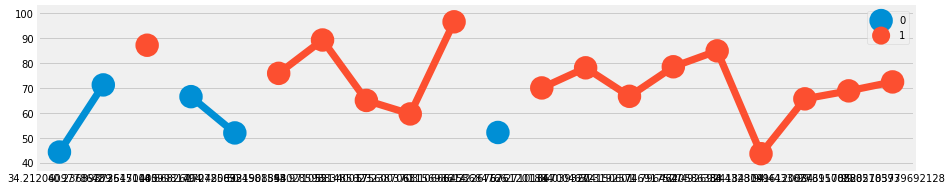

In [18]:
plt.figure(figsize=(14,3))
sns.pointplot(x=X_test.T[0],y=X_test.T[1],hue=y_test,)

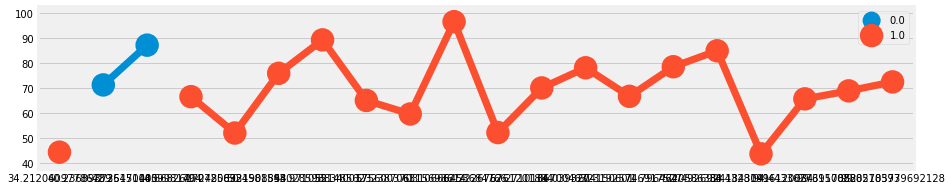

In [19]:
plt.figure(figsize=(14,3))
sns.pointplot(x=X_test.T[0],y=X_test.T[1],hue=y_pred,)